In [5]:
keras.backend.clear_session()

In [1]:
import cv2
import pandas as pd
import glob
import random
import numpy as np
import matplotlib.pyplot as plt #for plotting things
import os
import os.path
import shutil
import seaborn as sns
import joblib
from PIL import Image
print(os.listdir(r"C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import model_from_json
from tensorflow.keras.models import load_model
from keras.utils import plot_model

['.ipynb_checkpoints', 'cnn3_model_attempt1 19.05.2020.model', 'cnn3_model_attempt1_weights 19.05.2020.h5', 'cnn3_model_attempt2 19.05.2020.model', 'cnn3_model_attempt2_weights 19.05.2020.h5', 'cnn3_model_attempt4 19.05.2020.model', 'cnn3_model_attempt4_weights 19.05.2020.h5', 'cnn3_model_attempt5_moreimages 19.05.2020.model', 'cnn3_model_attempt5_moreimages_weights 19.05.2020.h5', 'cnn3_model_attempt5_normalimages 20.05.2020.model', 'cnn3_model_attempt5_normalimages_FINAL 20.05.2020.model', 'cnn3_model_attempt5_normalimages_weights 20.05.2020.h5', 'cnn3_model_attempt5_normalimages_weights_FINAL 20.05.2020.h5', 'COVID_Metadata_Analysis.ipynb', 'Image Processing_CNN Model_Pneumonia_LargerDataset.ipynb', 'Image Processing_CNN Pneumonia_and_COVID19.ipynb', 'Image Processing_PCA_TEST_CNN Model_Pneumonia_LargerDataset.ipynb', 'Image Processing_VGG Model_Pneumonia_LargerDataset.ipynb', 'KaggleClassifier.ipynb', 'test', 'train', 'val', '__MACOSX']


Using TensorFlow backend.


In [7]:
train_images = r"C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\train"
val_images = r"C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\val"
test_images = r"C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\test"

#### This function serves to feed in the from the train, validation and test image datasets, label them appropiately as a 0 or a 1 based on their location (either in the Pneumonia or Normal files). Then, it iterates through the images, converts them to grayscale, resizes the image to a smaller 128 x 128 dimension and converts it into an array of numbers. This list of pixels, along with the label (0 or 1), is then appended into the an array. 

In [8]:
labels = ['PNEUMONIA', 'NORMAL']

def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        print(path)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), 
                                     cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (128, 128))
                data.append([resized_arr, class_num])
            
            except Exception as e:
                print(e)
    return np.array(data)

In [9]:
train = get_training_data(r"C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\train")
val = get_training_data(r"C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\val")
test = get_training_data(r"C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\test")

C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\train\PNEUMONIA
C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\train\NORMAL
C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\val\PNEUMONIA
C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\val\NORMAL
C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\test\PNEUMONIA
C:\Users\Gareth\Desktop\Ironhack\Week_Eight\Project_Datasets\chest_xray\test\NORMAL


#### Here's the distribution of our images per set.

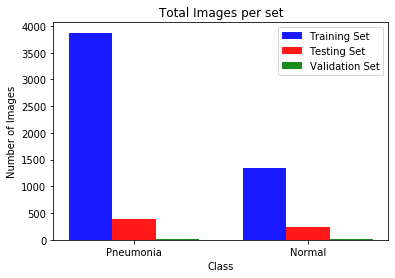

In [10]:
train_cases = pd.DataFrame(train)
test_cases = pd.DataFrame(test)
val_cases = pd.DataFrame(val)

train_cases = train_cases[1].value_counts()
test_cases = test_cases[1].value_counts()
val_cases = val_cases[1].value_counts()

index = np.arange(2)
bar_width = 0.25
opacity = 0.9

train_bar = plt.bar(index, train_cases, bar_width,
                alpha=opacity, color='b',
                label='Training Set')
test_bar = plt.bar(index + bar_width, test_cases, bar_width,
                alpha=opacity, color='r', tick_label = ('Pneumonia', 'Normal'),
                label='Testing Set')
val_bar = plt.bar(index + 2*bar_width, val_cases, bar_width,
                  alpha=opacity, color='g', tick_label = ('Pneumonia', 'Normal'),
                label='Validation Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Images per set')
plt.xticks(index + bar_width)
plt.legend()

plt.show()

Text(0.5, 1.0, 'PNEUMONIA')

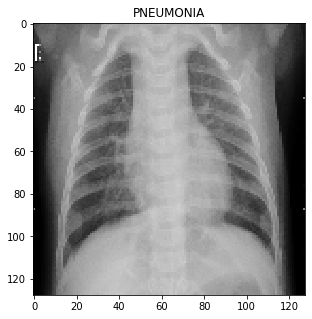

In [27]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0], cmap = 'gray')
plt.title(labels[train[1][1]])

Text(0.5, 1.0, 'NORMAL')

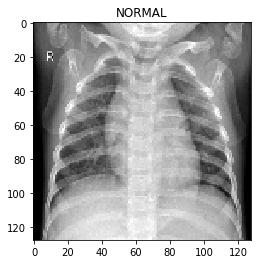

In [28]:
plt.imshow(train[5000][0], cmap = 'gray')
plt.title(labels[train[5000][1]])

In [12]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [13]:
x_train[0]

array([[19, 27, 30, ..., 16,  9,  2],
       [24, 26, 34, ..., 17, 11,  4],
       [22, 30, 39, ..., 19, 11,  4],
       ...,
       [10,  8,  7, ..., 15, 15, 15],
       [10,  8,  7, ..., 15, 15, 15],
       [10, 10,  7, ..., 15, 15, 15]], dtype=uint8)

In [14]:
len(x_train)

5216

### Reducing the Colour Data Down to Grayscale (0 - 1) instead of (0 - 255)

In [15]:
x_train_pca = np.array(x_train) / 255
x_val_pca = np.array(x_val) / 255
x_test_pca = np.array(x_test) / 255

In [16]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [17]:
print(x_train.shape)
x_train[0]

(5216, 128, 128)


array([[0.0745098 , 0.10588235, 0.11764706, ..., 0.0627451 , 0.03529412,
        0.00784314],
       [0.09411765, 0.10196078, 0.13333333, ..., 0.06666667, 0.04313725,
        0.01568627],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.0745098 , 0.04313725,
        0.01568627],
       ...,
       [0.03921569, 0.03137255, 0.02745098, ..., 0.05882353, 0.05882353,
        0.05882353],
       [0.03921569, 0.03137255, 0.02745098, ..., 0.05882353, 0.05882353,
        0.05882353],
       [0.03921569, 0.03921569, 0.02745098, ..., 0.05882353, 0.05882353,
        0.05882353]])

In [20]:
img_size = 128

In [21]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [22]:
print(x_train.shape)

(5216, 128, 128, 1)


In [23]:
x_train[0]

array([[[0.0745098 ],
        [0.10588235],
        [0.11764706],
        ...,
        [0.0627451 ],
        [0.03529412],
        [0.00784314]],

       [[0.09411765],
        [0.10196078],
        [0.13333333],
        ...,
        [0.06666667],
        [0.04313725],
        [0.01568627]],

       [[0.08627451],
        [0.11764706],
        [0.15294118],
        ...,
        [0.0745098 ],
        [0.04313725],
        [0.01568627]],

       ...,

       [[0.03921569],
        [0.03137255],
        [0.02745098],
        ...,
        [0.05882353],
        [0.05882353],
        [0.05882353]],

       [[0.03921569],
        [0.03137255],
        [0.02745098],
        ...,
        [0.05882353],
        [0.05882353],
        [0.05882353]],

       [[0.03921569],
        [0.03921569],
        [0.02745098],
        ...,
        [0.05882353],
        [0.05882353],
        [0.05882353]]])

### ImageDataGenerator
#### This parameter can be used to generate more data from our dataset by feeding in images and manipulating them by flipping their horizontal axis or rotating them. This serves as a way to artificially increase the size of our dataset. This is applied to both the Training Data and Validation Data.

In [26]:
datagen = ImageDataGenerator(horizontal_flip = True,
                             rotation_range = 10,
                            zoom_range = 0.15,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.15)

In [44]:
cnn3 = Sequential()

#Convolution
cnn3.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 1)))

#Pooling
cnn3.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn3.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn3.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn3.add(Flatten())

# Density
cnn3.add(Dense(activation = 'relu', units = 2048, kernel_initializer = 'uniform'))
cnn3.add(Dense(activation = 'relu', units = 1024, kernel_initializer = 'uniform'))
cnn3.add(Dense(activation = 'relu', units = 512, kernel_initializer = 'uniform'))
cnn3.add(Dense(activation = 'relu', units = 265, kernel_initializer = 'uniform'))
cnn3.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

# Compile 
cnn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              58984448  
_________________________________________________________________
dense_7 (Dense)              (None, 1024)             

In [34]:
history = cnn3.fit(datagen.flow(x_train, y_train, batch_size = 50), epochs = 15,
                                  validation_data = datagen.flow(x_val, y_val))

Epoch 1/15
105/105 [==============================] - 91s 862ms/step - loss: 0.5276 - accuracy: 0.7542 - val_loss: 0.6830 - val_accuracy: 0.6875
Epoch 2/15
105/105 [==============================] - 90s 853ms/step - loss: 0.3380 - accuracy: 0.8489 - val_loss: 1.7679 - val_accuracy: 0.5000
Epoch 3/15
105/105 [==============================] - 90s 860ms/step - loss: 0.2653 - accuracy: 0.8836 - val_loss: 1.0405 - val_accuracy: 0.6250
Epoch 4/15
105/105 [==============================] - 92s 874ms/step - loss: 0.2538 - accuracy: 0.8921 - val_loss: 1.0251 - val_accuracy: 0.6250
Epoch 5/15
105/105 [==============================] - 95s 903ms/step - loss: 0.2329 - accuracy: 0.8984 - val_loss: 1.0540 - val_accuracy: 0.5625
Epoch 6/15
105/105 [==============================] - 98s 931ms/step - loss: 0.2157 - accuracy: 0.9130 - val_loss: 0.9557 - val_accuracy: 0.6875
Epoch 7/15
105/105 [==============================] - 100s 955ms/step - loss: 0.2023 - accuracy: 0.9195 - val_loss: 0.6781 - val_a

In [35]:
print("Loss of the model is - " , cnn3.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , cnn3.evaluate(x_test,y_test)[1]*100 , "%")

624/624 [==============================] - 2s 3ms/step
Loss of the model is -  34.560774811185325 %
624/624 [==============================] - 2s 3ms/step
Accuracy of the model is -  86.21794581413269 %


In [36]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9411426
validation_accuracy 0.625


In [37]:
predictions = cnn3.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

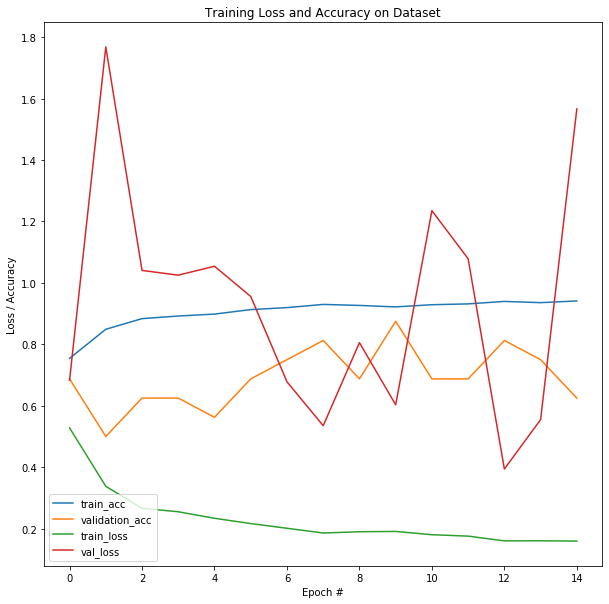

In [38]:
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label = "train_acc")
plt.plot(history.history['val_accuracy'], label = "validation_acc")
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.title('Training Loss and Accuracy on Dataset')
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch #')
plt.legend(loc='lower left')
plt.show()

In [39]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.83      0.98      0.90       390
   Normal (Class 1)       0.96      0.66      0.78       234

           accuracy                           0.86       624
          macro avg       0.90      0.82      0.84       624
       weighted avg       0.88      0.86      0.86       624



In [40]:
cm = confusion_matrix(y_test,predictions)
cm

array([[384,   6],
       [ 80, 154]], dtype=int64)

In [41]:
cm_df = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

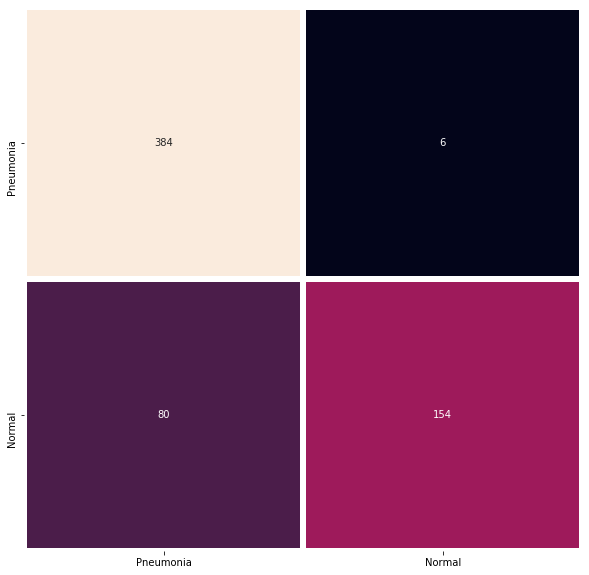

In [42]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_df, linewidth = 5 , annot = True, fmt='d',
           xticklabels = ['Pneumonia', 'Normal'],
           yticklabels = ['Pneumonia', 'Normal'],
           cbar = False)

In [43]:
cnn3.save('cnn3_model_attempt5_normalimages_FINAL 20.05.2020.model')
cnn3.save_weights('cnn3_model_attempt5_normalimages_weights_FINAL 20.05.2020.h5')